## 1. Import File ke Google Colab

In [18]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [19]:
import pandas as pd

df = pd.read_csv('dataset.csv')

# Cek dataset
print(df.head())

                               reviewId         userName  \
0  10042ba2-73d7-4371-baed-97f66b96e217  Pengguna Google   
1  da13367a-5fba-4a8d-bb14-cd90cde7a174  Pengguna Google   
2  b3c5d574-bcc8-49de-88a6-c0ace8c30b8c  Pengguna Google   
3  3d6b1356-5e9c-46c0-b4a2-535bc848b04a  Pengguna Google   
4  65559efd-c8f0-479a-b5c2-d78ee625e58e  Pengguna Google   

                                           userImage  \
0  https://play-lh.googleusercontent.com/EGemoI2N...   
1  https://play-lh.googleusercontent.com/EGemoI2N...   
2  https://play-lh.googleusercontent.com/EGemoI2N...   
3  https://play-lh.googleusercontent.com/EGemoI2N...   
4  https://play-lh.googleusercontent.com/EGemoI2N...   

                                             content  score  thumbsUpCount  \
0  TOKOPEDIA sangat² miskin, gratis ongkir sama v...      1              1   
1  pengembalian saldo Tokopedia dari rekening lam...      2              0   
2  saya sdh email ke tokopedia, sekarang tokopedi...      2         

## Tokenisasi Kata

In [20]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r"http\S+", '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    text = text.replace('\n', ' ')
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip(' ')
    return text

def casefoldingText(text):
    text = text.lower()
    return text

def tokenizingText(text):
    text = word_tokenize(text)
    return text

def filteringText(text):
    # Proses pengambilan daftar stopwords standar
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)

    # Menghapus kata-kata bermakna sentimen dari daftar hapus
    kata_penting = {
        'tidak', 'kurang', 'belum', 'bukan', 'jangan',
        'masalah', 'baik', 'bisa', 'mampu', 'sulit', 'susah'
    }
    listStopwords = listStopwords - kata_penting

    # Menambahkan kata-kata gaul/sampah yang memang tidak punya makna sentimen
    listStopwords.update([
        'iya','yaa','gak','nya','na','sih','ku',"di","ga","ya",
        "gaa","loh","kah","woi","woii","woy", "yg", "apps"
    ])

    # Melakukan pembersihan
    filtered = [txt for txt in text if txt not in listStopwords]
    return filtered

def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence




## Slang Word

In [21]:
slangwords = {"@": "di", "pa": "apa", "aju": "aku", "ga": "tidak", "gak": "tidak", "tdk": "tidak", "dah": "sudah", "yg": "yang", "gatau": "tidak tahu", "tau": "tahu", "pake": "pakai", "ancur": "hancur", "gini": "begini", "apk": "aplikasi", "gk": "tidak", "gak": "tidak", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal",
"sy": "saya", "kk": "kakak", "gw": "saya", "ongkir": "ongkos kirim", "kalo": "kalau", "min": "admin", "tp": "tapi", "sasah": "salah", "bs": "bisa", "mulu": "melulu", "dh": "sudah", "moga": "semoga", "trus": "terus", "pk": "aplikasi", "kak": "kakak" }
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

## Stemming

In [22]:
!pip install Sastrawi

In [24]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmingText(text):
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

clean_df = pd.read_csv('dataset.csv')

# Mengambil 5000 sampel data secara acak
clean_df_small = clean_df.sample(n=5000, random_state=42)

clean_df_small['text_clean'] = clean_df_small['content'].apply(cleaningText).apply(casefoldingText)
clean_df_small['text_tokens'] = clean_df_small['text_clean'].apply(tokenizingText).apply(filteringText)
clean_df_small['text_for_stemming'] = clean_df_small['text_tokens'].apply(toSentence)

print("Memulai Stemming...")
clean_df_small['text_stemmed'] = clean_df_small['text_for_stemming'].apply(stemmingText)

print("Selesai!")



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Memulai Stemming...
Selesai!


## Labeling

In [25]:
def label_sentimen(score):
    if score <= 2:
        return 'Negatif'
    elif score == 3:
        return 'Netral'
    else:
        return 'Positif'

clean_df['label'] = clean_df['score'].apply(label_sentimen)
print(clean_df['label'].value_counts())

label
Positif    122434
Negatif     56950
Netral       9616
Name: count, dtype: int64


## Pie Chart

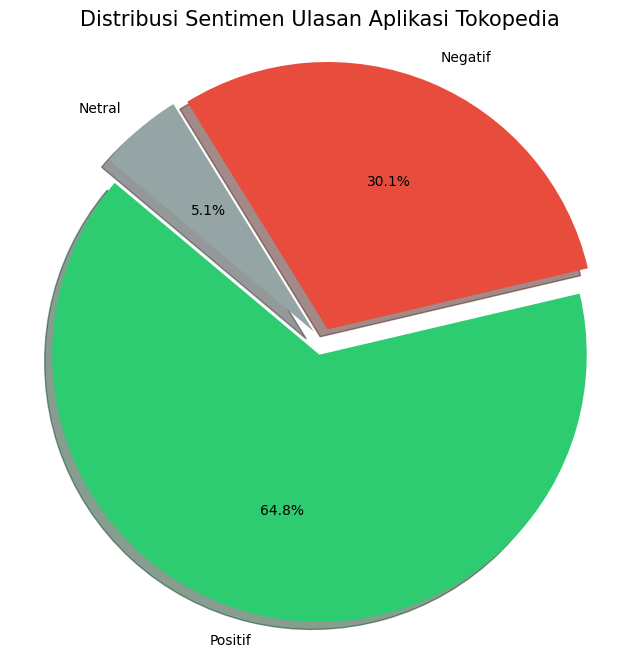

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung jumlah setiap sentimen
labels = clean_df['label'].value_counts().index
counts = clean_df['label'].value_counts().values

# Menentukan warna untuk setiap hasil ulasan (Merah = Negatif, Abu-abu = Netral, Hijau = Positif)
colors = ['#ff9999','#66b3ff','#99ff99']
# Menyesuaikan warna
palette_color = sns.color_palette('pastel')

# 3. Membuat Plot
plt.figure(figsize=(8, 8))
plt.pie(counts,
        labels=labels,
        autopct='%1.1f%%', # Menampilkan presentase dengan 1 angka di belakang koma
        startangle=140,
        colors=['#2ecc71', '#e74c3c', '#95a5a6'], # Hijau, Merah, Abu-abu
        explode=(0.05, 0.05, 0.05), # Memberi jarak antar potongan
        shadow=True)

plt.title('Distribusi Sentimen Ulasan Aplikasi Tokopedia', fontsize=15)
plt.axis('equal') # Membentuk pie chart (lingkaran)
plt.show()

In [27]:
def give_label(score):
    if score <= 2:
        return 'Negatif'
    elif score == 3:
        return 'Netral'
    else:
        return 'Positif'

# Menerapkan label ke data sampel
clean_df_small['label'] = clean_df_small['score'].apply(give_label)

## WordCloud

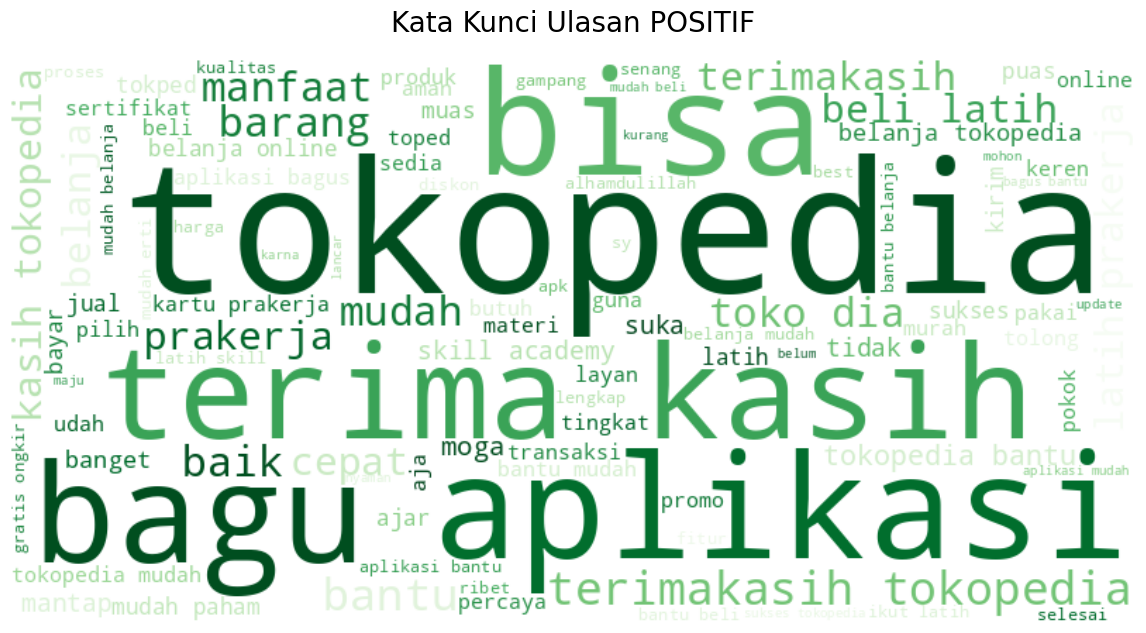

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan WordCloud
def show_wordcloud(data, title, color):
    # Menggabungkan semua baris teks dari kolom 'text_stemmed'
    text = ' '.join(data['text_stemmed'].dropna().astype(str))

    if len(text.strip()) == 0:
        print(f"Peringatan: Tidak ada teks untuk kategori {title}")
        return

    # Inisialisasi WordCloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap=color,
        max_words=100
    ).generate(text)

    # Plotting
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20, pad=20)
    plt.axis('off')

# Menyiapkan area gambar
plt.figure(figsize=(15, 18))

# Warna Hijau untuk WordCloud POSITIF
plt.subplot(3, 1, 1)
subset_pos = clean_df_small[clean_df_small['label'] == 'Positif']
if not subset_pos.empty:
    show_wordcloud(subset_pos, 'Kata Kunci Ulasan POSITIF', 'Greens')



plt.tight_layout()
plt.show()

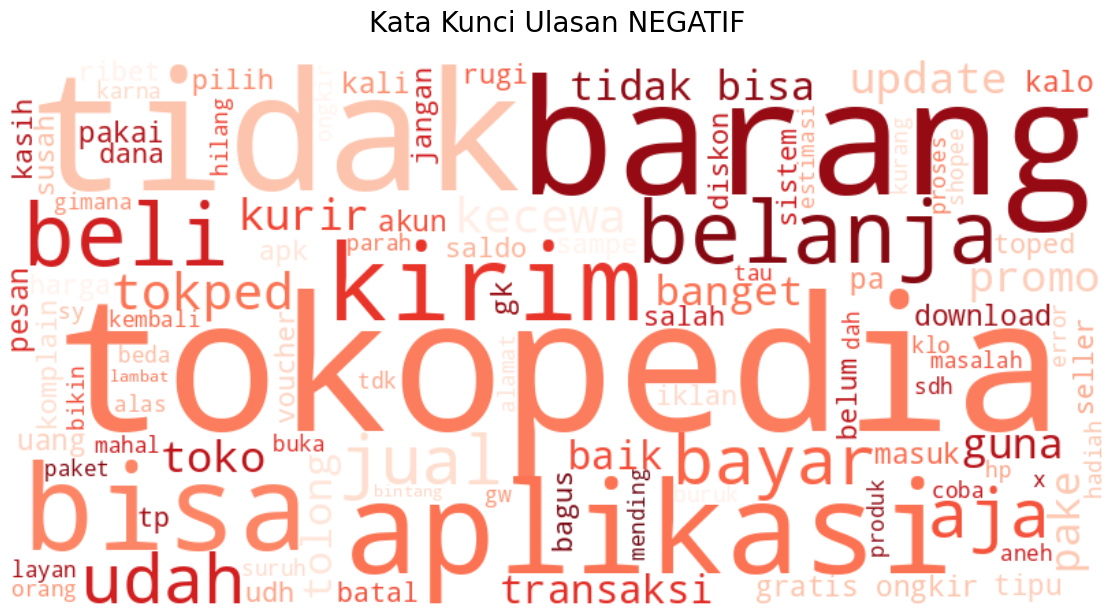

In [31]:
def show_wordcloud(data, title, color):
    # Menggabungkan semua baris teks dari kolom 'text_stemmed'
    text = ' '.join(data['text_stemmed'].dropna().astype(str))

    if len(text.strip()) == 0:
        print(f"Peringatan: Tidak ada teks untuk kategori {title}")
        return

    # Inisialisasi WordCloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap=color,
        max_words=100
    ).generate(text)

    # Plotting
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20, pad=20)
    plt.axis('off')

# Menyiapkan area gambar
plt.figure(figsize=(15, 18))
# Warna Merah WordCloud NEGATIF
plt.subplot(3, 1, 2)
subset_neg = clean_df_small[clean_df_small['label'] == 'Negatif']
if not subset_neg.empty:
    show_wordcloud(subset_neg, 'Kata Kunci Ulasan NEGATIF', 'Reds')

plt.tight_layout()
plt.show()

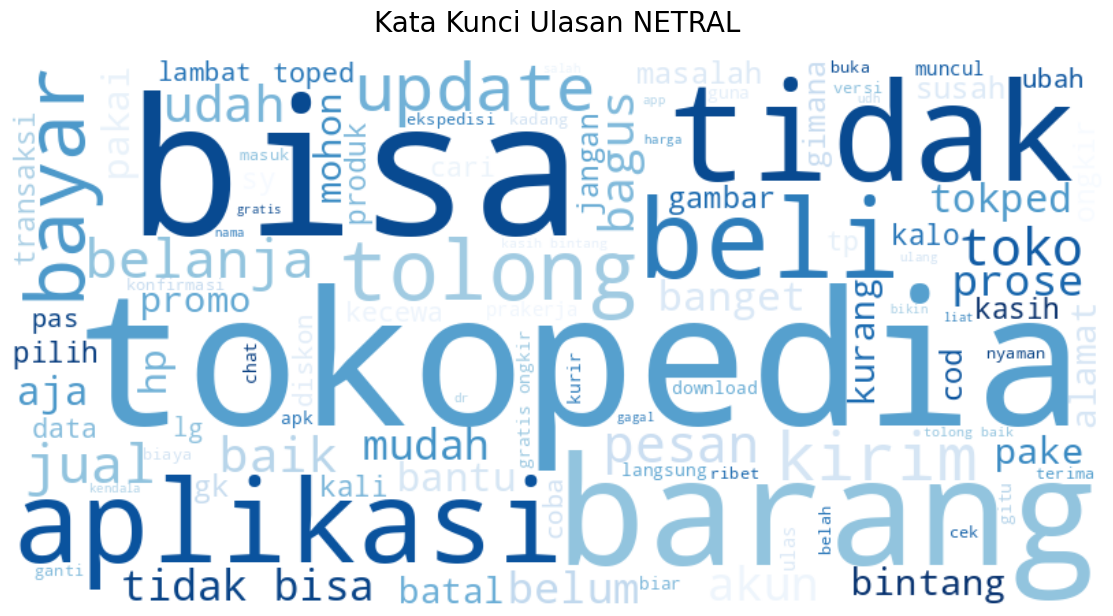

In [32]:
# WordCloud Netral
def show_wordcloud(data, title, color):
    # Menggabungkan semua baris teks dari kolom 'text_stemmed'
    text = ' '.join(data['text_stemmed'].dropna().astype(str))

    if len(text.strip()) == 0:
        print(f"Peringatan: Tidak ada teks untuk kategori {title}")
        return

    # Inisialisasi WordCloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap=color,
        max_words=100
    ).generate(text)

    # Plotting
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20, pad=20)
    plt.axis('off')

# Menyiapkan area gambar
plt.figure(figsize=(15, 18))
# Warna Biru untuk WordCloud NETRAL
plt.subplot(3, 1, 3)
subset_net = clean_df_small[clean_df_small['label'] == 'Netral']
if not subset_net.empty:
    show_wordcloud(subset_net, 'Kata Kunci Ulasan NETRAL', 'Blues')

plt.tight_layout()
plt.show()

## Ekstraksi

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns

# Menggunakan N-Gram agar model mampu memahami hubungan antar kata (menggabungkan kata yang berkesesuaian)
tfidf = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)

clean_df_final = clean_df_small[clean_df_small['label'] != 'Netral'] # membersihkan data netral agar akurasi lebih tinggi
X = tfidf.fit_transform(clean_df_final['text_stemmed']).toarray()
y = clean_df_final['label']

# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from collections import Counter
from imblearn.over_sampling import RandomOverSampler

# RandomOverSampler agar data seimbang
ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

model = SVC(kernel='rbf', C=100, gamma='scale', random_state=42)
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test)

In [34]:
from sklearn.model_selection import train_test_split

# Membagi data (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Data latih: {len(X_train)} ulasan")
print(f"Data uji: {len(X_test)} ulasan")

Data latih: 3789 ulasan
Data uji: 948 ulasan


## Modeling

In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Cek Skor Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy * 100:.2f}%")

# Laporan Lengkap
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))



Akurasi Model: 91.24%

Laporan Klasifikasi:
              precision    recall  f1-score   support

     Negatif       0.85      0.87      0.86       294
     Positif       0.94      0.93      0.94       654

    accuracy                           0.91       948
   macro avg       0.90      0.90      0.90       948
weighted avg       0.91      0.91      0.91       948



## Visualisasi

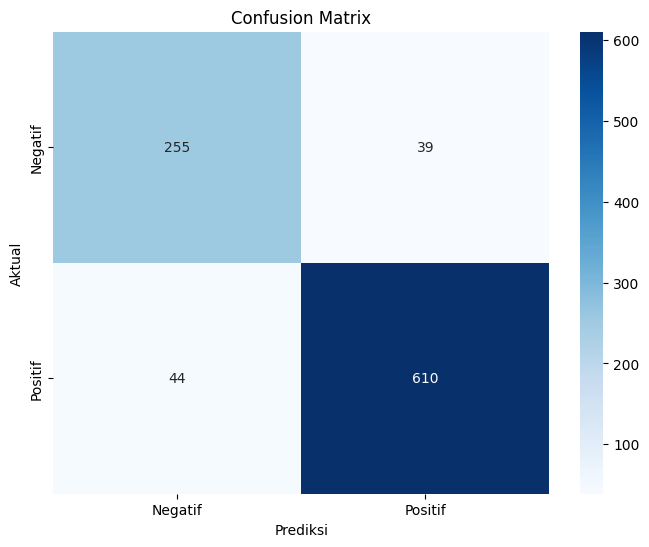

In [36]:
# Visualisasi Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

##Testing

In [40]:
test_teks = ["Aplikasi ini bagus, dan sangat membantu baik untuk seller maupun customer"]
test_vector = tfidf.transform(test_teks).toarray()
prediksi = model.predict(test_vector)

print(f"Hasil Analisis: {prediksi[0]}")

Hasil Analisis: Positif
